# Seasonal Profits Tables

*Import programs*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
budget = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')
budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [3]:
def getSeason(release_date):
    if (release_date[0:3] == "Dec") or  (release_date[0:3] == "Jan") or (release_date[0:3] == "Feb"):
        return "Winter"
    elif(release_date[0:3] == "Mar") or (release_date[0:3] == "Apr") or (release_date[0:3] == "May"):
        return "Spring"
    elif(release_date[0:3] == "Jun") or (release_date[0:3] == "Jul") or (release_date[0:3] == "Aug"):
        return "Summer"
    else:
        return "Fall"
    
season = budget.release_date.apply(getSeason)
budget['Season'] = season
budget

        

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Season
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Winter
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",Spring
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",Summer
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",Spring
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",Winter
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,Winter
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",Spring
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",Summer
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,Fall


In [4]:
budget["year"] = budget.release_date.apply(lambda x: x[-4:])
budget.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
Season               object
year                 object
dtype: object

In [5]:
budget.year = budget.year.astype(int)


In [6]:
budget = budget[budget.year>=2016]

In [7]:
budget["Season"].value_counts()

Winter    172
Spring    153
Fall      147
Summer    128
Name: Season, dtype: int64

In [8]:
budget['production_budget'] = budget['production_budget'].str.replace('$', '')
budget['domestic_gross'] = budget['domestic_gross'].str.replace('$', '')
budget['production_budget'] = budget['production_budget'].str.replace(',', '')
budget['domestic_gross'] = budget['domestic_gross'].str.replace(',', '')

budget

<ipython-input-8-7a4b55539a81>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  budget['production_budget'] = budget['production_budget'].str.replace('$', '')
<ipython-input-8-7a4b55539a81>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  budget['domestic_gross'] = budget['domestic_gross'].str.replace('$', '')
<ipython-input-8-7a4b55539a81>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Season,year
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,"$149,762,350",Summer,2019
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,"$1,316,721,747",Winter,2017
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,"$2,048,134,200",Spring,2018
8,9,"Nov 17, 2017",Justice League,300000000,229024295,"$655,945,209",Fall,2017
11,12,"May 25, 2018",Solo: A Star Wars Story,275000000,213767512,"$393,151,347",Spring,2018
...,...,...,...,...,...,...,...,...
5675,76,"May 24, 2016",Une Femme MariÃ©e,120000,0,$0,Spring,2016
5685,86,"Jul 7, 2017",A Ghost Story,100000,1594798,"$2,769,782",Summer,2017
5737,38,"Mar 18, 2016",Krisha,30000,144822,"$144,822",Spring,2016
5744,45,"Jan 27, 2017",Emily,27000,3547,"$3,547",Winter,2017


In [9]:
budget[['domestic_gross', 'production_budget']] = budget[['domestic_gross', 'production_budget']].apply(pd.to_numeric)
budget = budget.drop(columns="worldwide_gross") #profit column
budget

/Users/katherineskoda/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,id,release_date,movie,production_budget,domestic_gross,Season,year
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,Summer,2019
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,Winter,2017
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,Spring,2018
8,9,"Nov 17, 2017",Justice League,300000000,229024295,Fall,2017
11,12,"May 25, 2018",Solo: A Star Wars Story,275000000,213767512,Spring,2018
...,...,...,...,...,...,...,...
5675,76,"May 24, 2016",Une Femme MariÃ©e,120000,0,Spring,2016
5685,86,"Jul 7, 2017",A Ghost Story,100000,1594798,Summer,2017
5737,38,"Mar 18, 2016",Krisha,30000,144822,Spring,2016
5744,45,"Jan 27, 2017",Emily,27000,3547,Winter,2017


In [10]:
budget["profit"] = budget["domestic_gross"] - budget["production_budget"]
budget


,id,release_date,movie,production_budget,domestic_gross,Season,year,profit
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,Summer,2019,-307237650
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,Winter,2017,303181382
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,Spring,2018,378815482
8,9,"Nov 17, 2017",Justice League,300000000,229024295,Fall,2017,-70975705
11,12,"May 25, 2018",Solo: A Star Wars Story,275000000,213767512,Spring,2018,-61232488
...,...,...,...,...,...,...,...,...
5675,76,"May 24, 2016",Une Femme MariÃ©e,120000,0,Spring,2016,-120000
5685,86,"Jul 7, 2017",A Ghost Story,100000,1594798,Summer,2017,1494798
5737,38,"Mar 18, 2016",Krisha,30000,144822,Spring,2016,114822
5744,45,"Jan 27, 2017",Emily,27000,3547,Winter,2017,-23453


Text(0.5, 1.0, 'Seasonal profit')

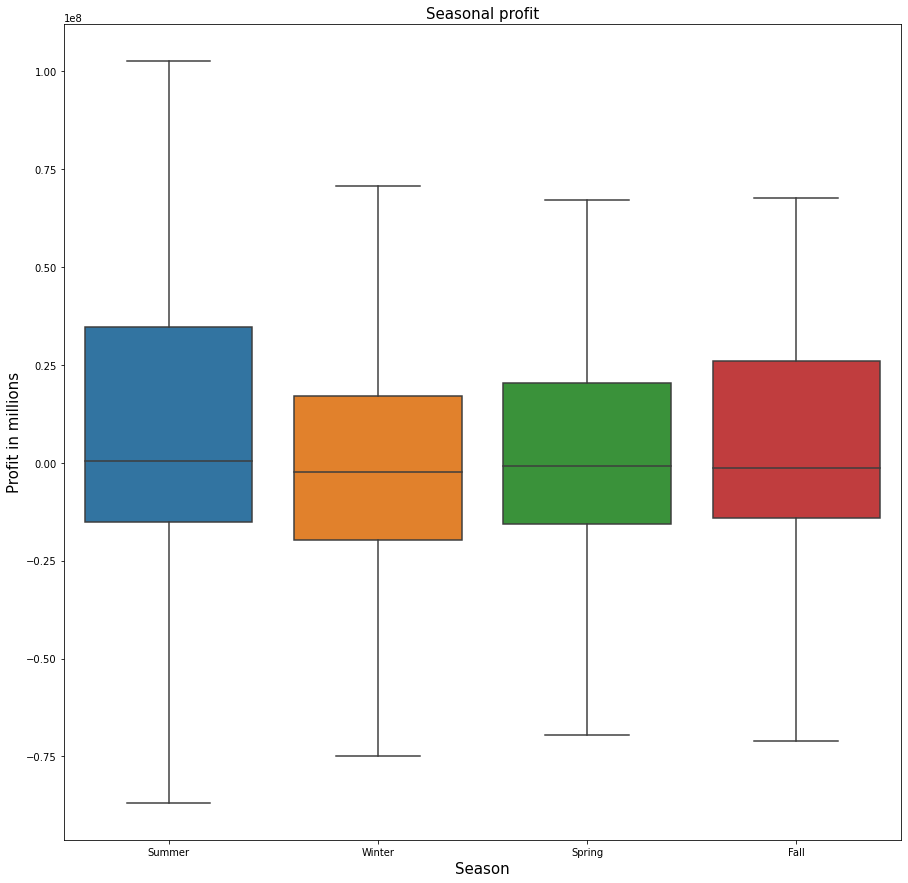

In [11]:
# Your code here
plot_five_fig, plot_five_ax = plt.subplots(figsize=(15,15))

sns.boxplot(x='Season', y='profit', data=budget, ax=plot_five_ax, showfliers=False)

plot_five_ax.set_xlabel('Season', fontsize = 15)

plot_five_ax.set_ylabel('Profit in millions', fontsize = 15)

plot_five_ax.set_title('Seasonal profit', fontsize = 15)

In [12]:
#Summer has the largest range which indicates a high risk of whether or not the profits will be great or negative

In [13]:
profit_mean = budget.profit.mean()
profit_mean

11396428.736666666

There is a mean profit of ~ 10 million dollars. To be successful, your movies should have a profit around that number

In [14]:
budget_mean = budget.production_budget.mean()
budget_mean

46796283.333333336

The mean budget is ~ 31 million dollars. Your movie should average a budget around that number to ensure a promising profit.

In [15]:
gross_mean = budget.domestic_gross.mean()
gross_mean

58192712.07

The average gross for american movies is around 42 million. You should be projecting your sales towards that number to be successful.

In [16]:
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
sns.set_theme(style="whitegrid")

penguins = sns.load_dataset("penguins")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=penguins, kind="bar",
    x="year", y="", hue="",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "U.S. Dollars ($)")
g.legend.set_title("")

In [18]:
budget.groupby('year').mean()


,id,production_budget,domestic_gross,profit
year,,,,
2016,49.643836,4.097370e+07,5.042387e+07,9.450175e+06
2017,51.422619,5.003073e+07,6.222259e+07,1.219186e+07
2018,53.286713,4.813886e+07,7.378870e+07,2.564984e+07
2019,51.791045,5.273896e+07,4.280029e+07,-9.938666e+06
2020,45.666667,9.400000e+07,0.000000e+00,-9.400000e+07


Text(0.5, 1.0, 'Yearly Profit')

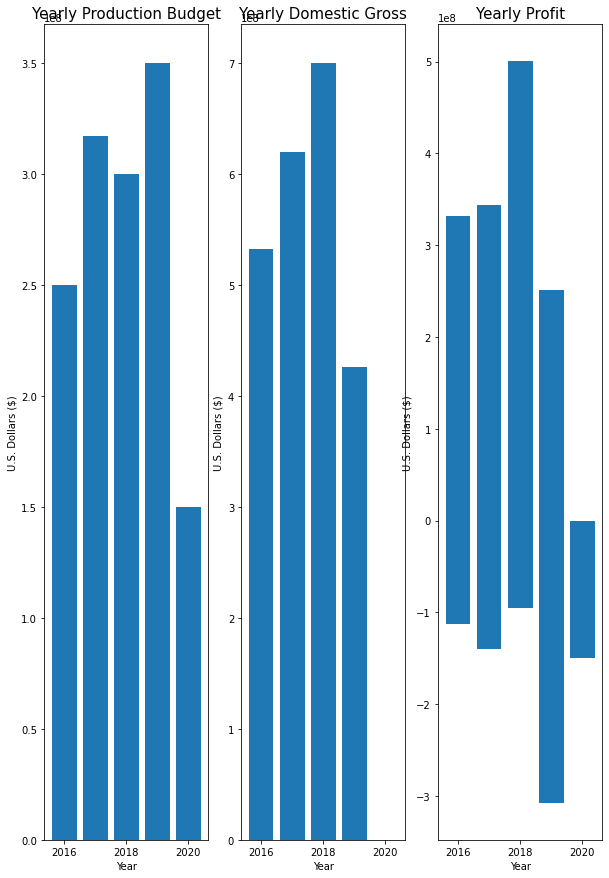

In [28]:
fig, ax = plt.subplots(figsize=(20,15), ncols=3)

ax[0].bar(budget.year, budget.production_budget)
ax[0].set_xlabel('Year')
ax[0].set_ylabel('U.S. Dollars ($)')
ax[0].set_title('Yearly Production Budget', fontsize=15)

ax[1].bar(budget.year, budget.domestic_gross)
ax[1].set_xlabel('Year')
ax[1].set_ylabel('U.S. Dollars ($)')
ax[1].set_title('Yearly Domestic Gross', fontsize=15)


ax[2].bar(budget.year, budget.profit)
ax[2].set_xlabel('Year')
ax[2].set_ylabel('U.S. Dollars ($)')
ax[2].set_title('Yearly Profit', fontsize=15)


